[![icons8-linkedin.gif](attachment:c9494563-7284-4c71-9fe4-40d31b4558ff.gif 'Author : Suryakant Kumar')](https://www.linkedin.com/in/suryakantkumar/)[![icons8-github.gif](attachment:ecd1af6f-8660-4379-b68f-bad3ed6d67c8.gif 'Author : Suryakant Kumar')](https://github.com/SuryakantKumar)
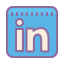
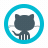

# <span style="color:skyblue">**How Airflow Works ?**</span>

Here's a simplified breakdown of how Apache Airflow's components work together in different architectures:

### <span style="color:orange">Single-Node Architecture</span>

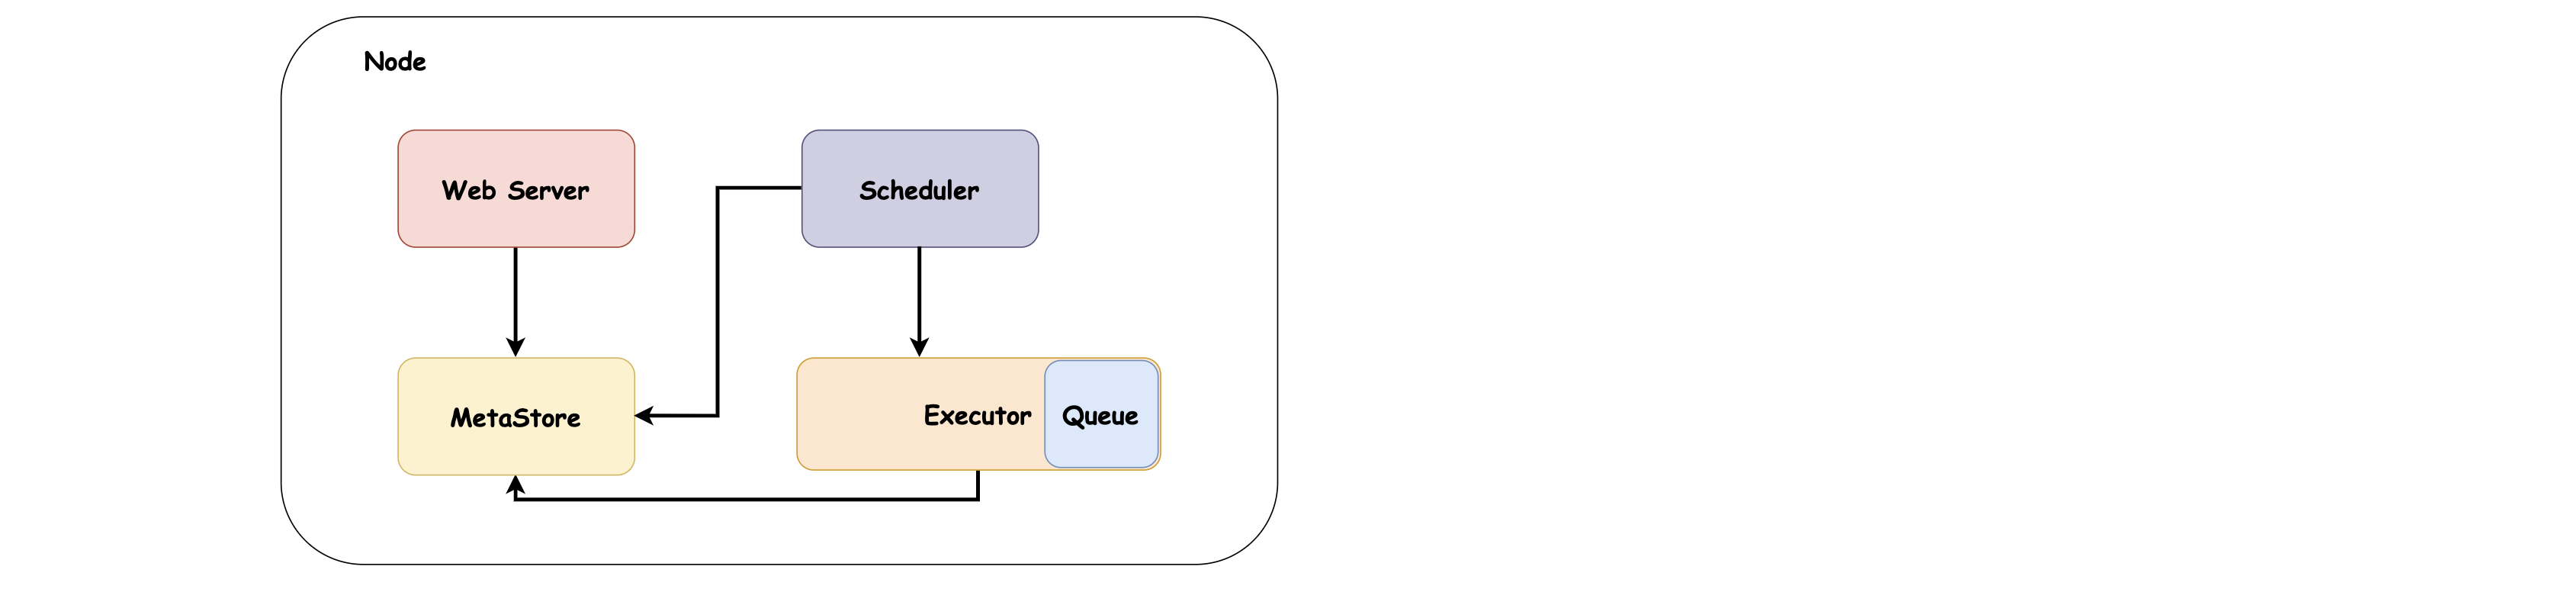

- **Components:** Web Server, Scheduler, Metastore (Metadata Database), Executor (all on one machine).

- **Workflow:**

  - At first, `Web server` fetches some metadata from the `Metastore` of airflow in order to display information corresponding to our `Dags`, `Task instances`, or our `Users` on the user interface.
  
  - Next, `Scheduler` Interacts with `Metastore` and `Executor` in order to trigger our `Dags` / `Tasks`.
  
  - Finally, `Executor` interacts with the `Metastore` in order to update the tasks that just have been completed.

      - It executes tasks in order using an internal `queue` to manage task execution.

      - By default, Airflow uses the `sequential executor`, executing tasks one after another.

      - To scale up Airflow, We can use the `local executor`, where tasks run in `subprocesses`.

The `scheduler`, `executor` and the `web server` interact together with the help of `metastore` (metadata database).

### <span style="color:orange">Multi-Node Architecture</span>

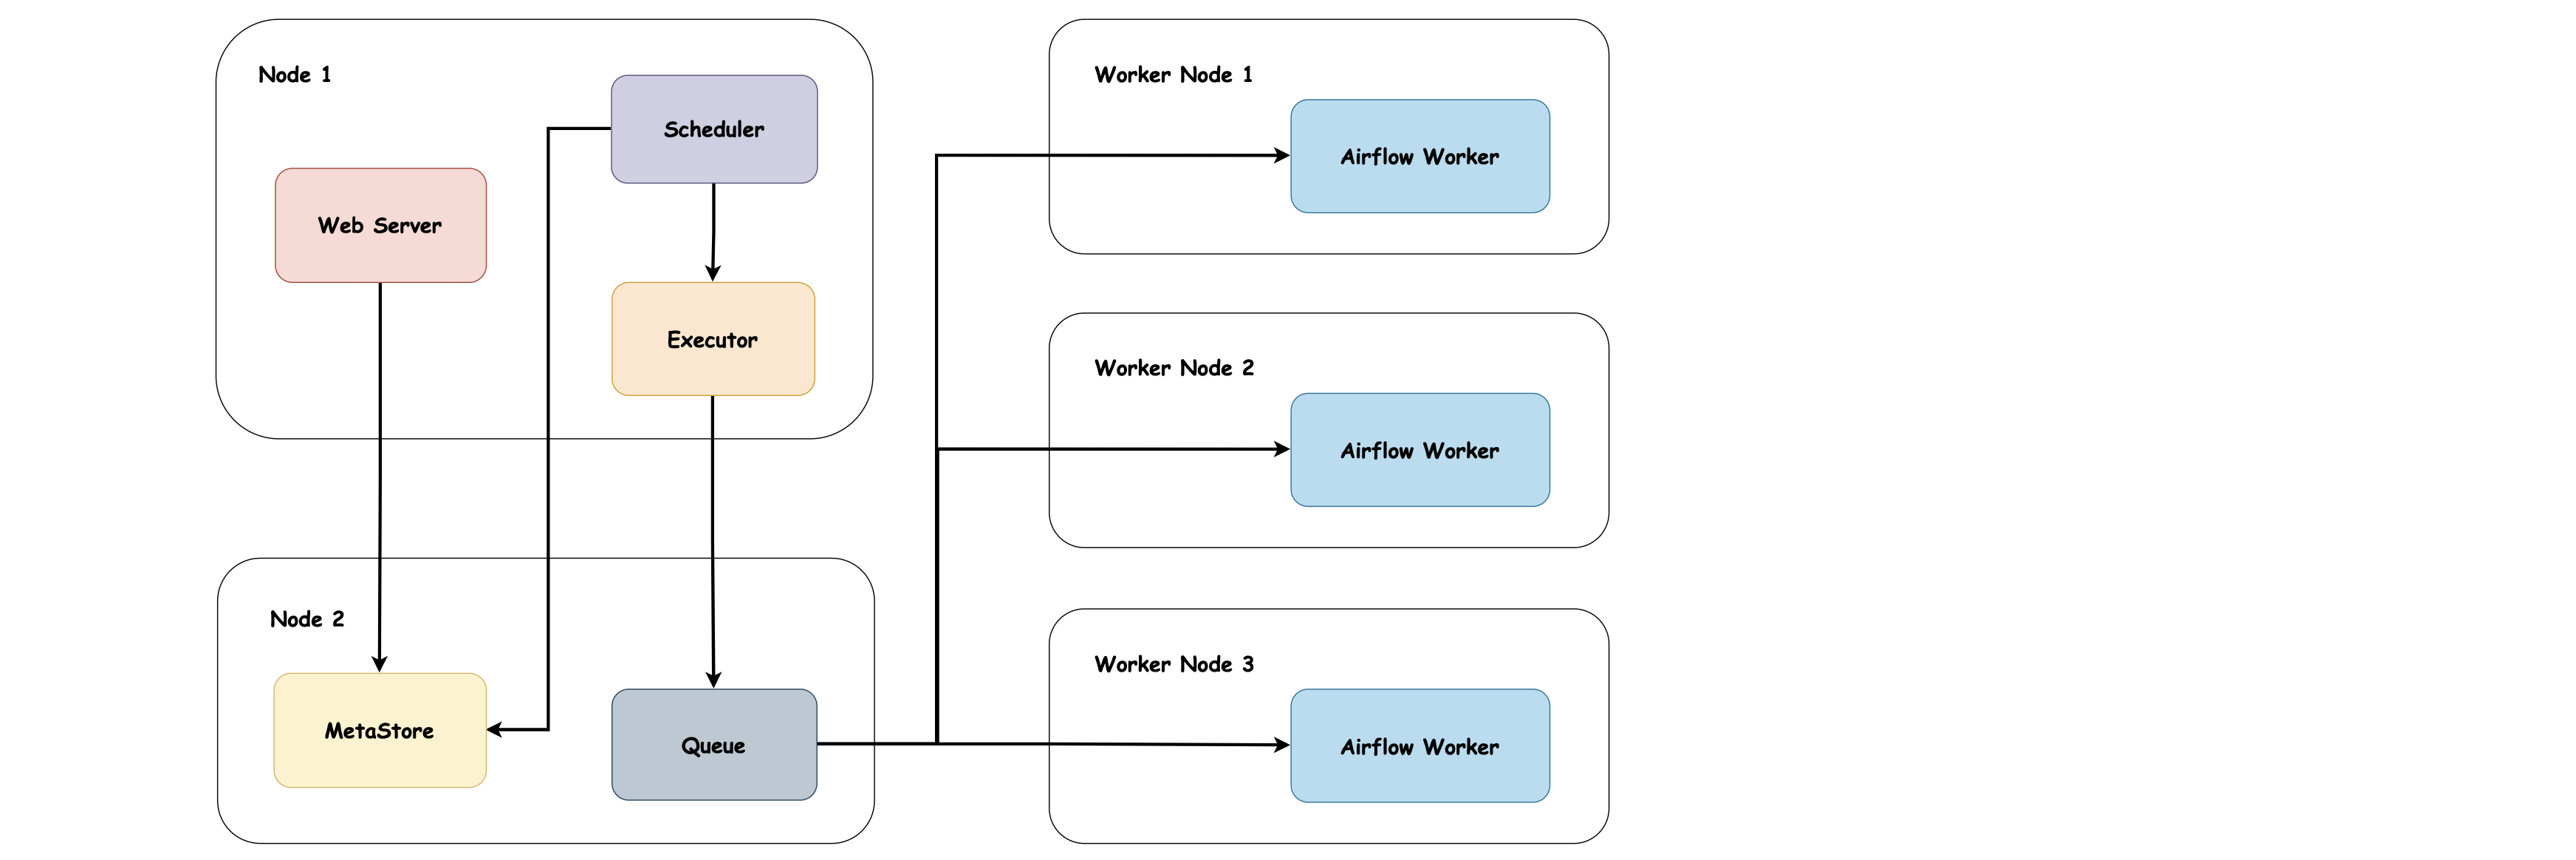

- We need a multi-node architecture to handle `large volume` of tasks efficiently.

- **Components:**

    - This setup involves `Celery executor`, a tool for processing tasks across multiple different machines.

    - In this architecture :

        - We'll have one node that contains components like the `web server`, `scheduler`, and `executor`.

        - We'll have another node that contains the `metastore` (metadata database) and an `external queue` like `Redis` or `RabbitMQ`. External queues distribute tasks across machines or `worker nodes`.

    - Each `worker node` such as Worker Node 1, 2 and 3 contains an `Airflow worker` component for task execution.

- **Workflow:**

    - We have `web server` that fetches some information from the `metastore`.

    - Next, `scheduler` interacts with the `executor` and the `metastore` as before.

    - This time `external executor` pushes the tasks into the `external queue` (RabbitMQ or Redis).
    
    - Once the tasks are in the `queue`, These are ready to be pulled by the `airflow workers`.
    
    - Each `airflow worker` then fetches tasks from the queue (RabbitMQ or Redis) for `execution`.

This process enables the execution of multiple tasks across various machines, facilitating distributed task execution in `Apache Airflow` to enhance scalability and performance.

### <span style="color:orange">How Airflow Works ?</span>

- **What happens when a `task` or a `DAG` (Directed Acyclic Graph) will be triggered ?**

- In Apache Airflow, Several components work together when a task or a DAG (Directed Acyclic Graph) is triggered.

- These components include the `web server`, `metastore`, `scheduler`, `executor` and the `directory` where DAGs are stored.

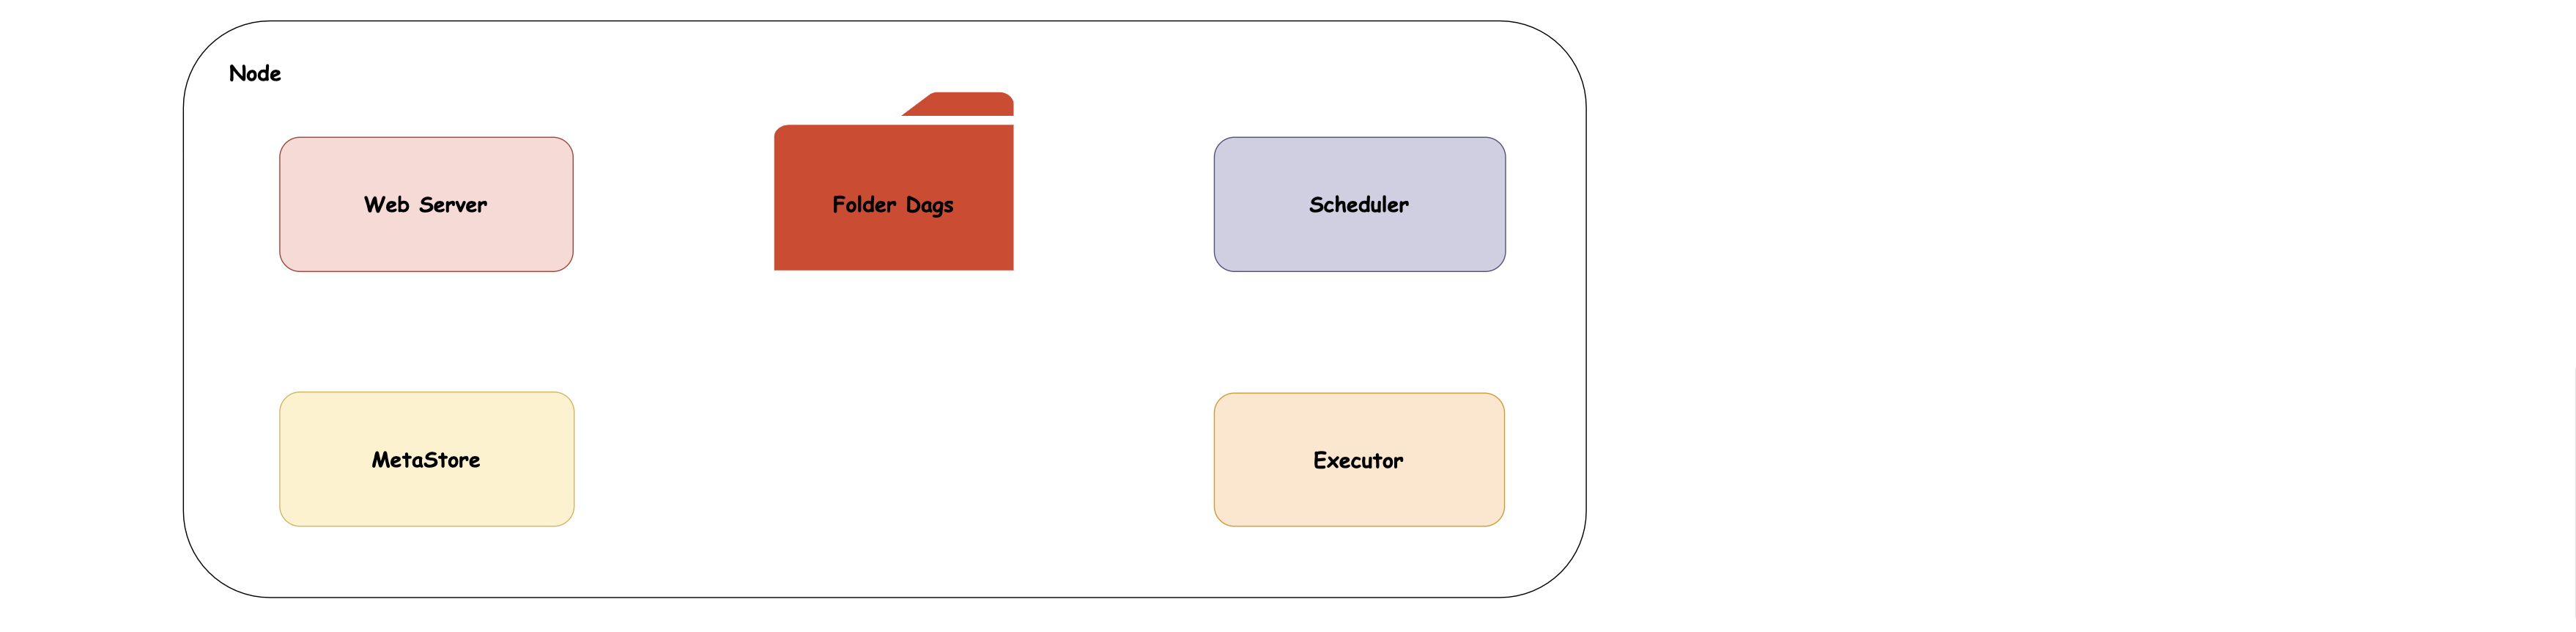

- Let's say we have a new DAG file named **`Dag.py`** in the DAG directory.

- Both the `scheduler` and the `web server` parse the `DAG` once it's added.

- Once it is parsed, the `scheduler` will verify if the DAG is ready to be triggered. If so, It creates a `DagRun` object representing the `instance` of our DAG running at a given time.

- Then, that `Dagrun` object is stored in the `metastore` of airflow with the status **`running`**.

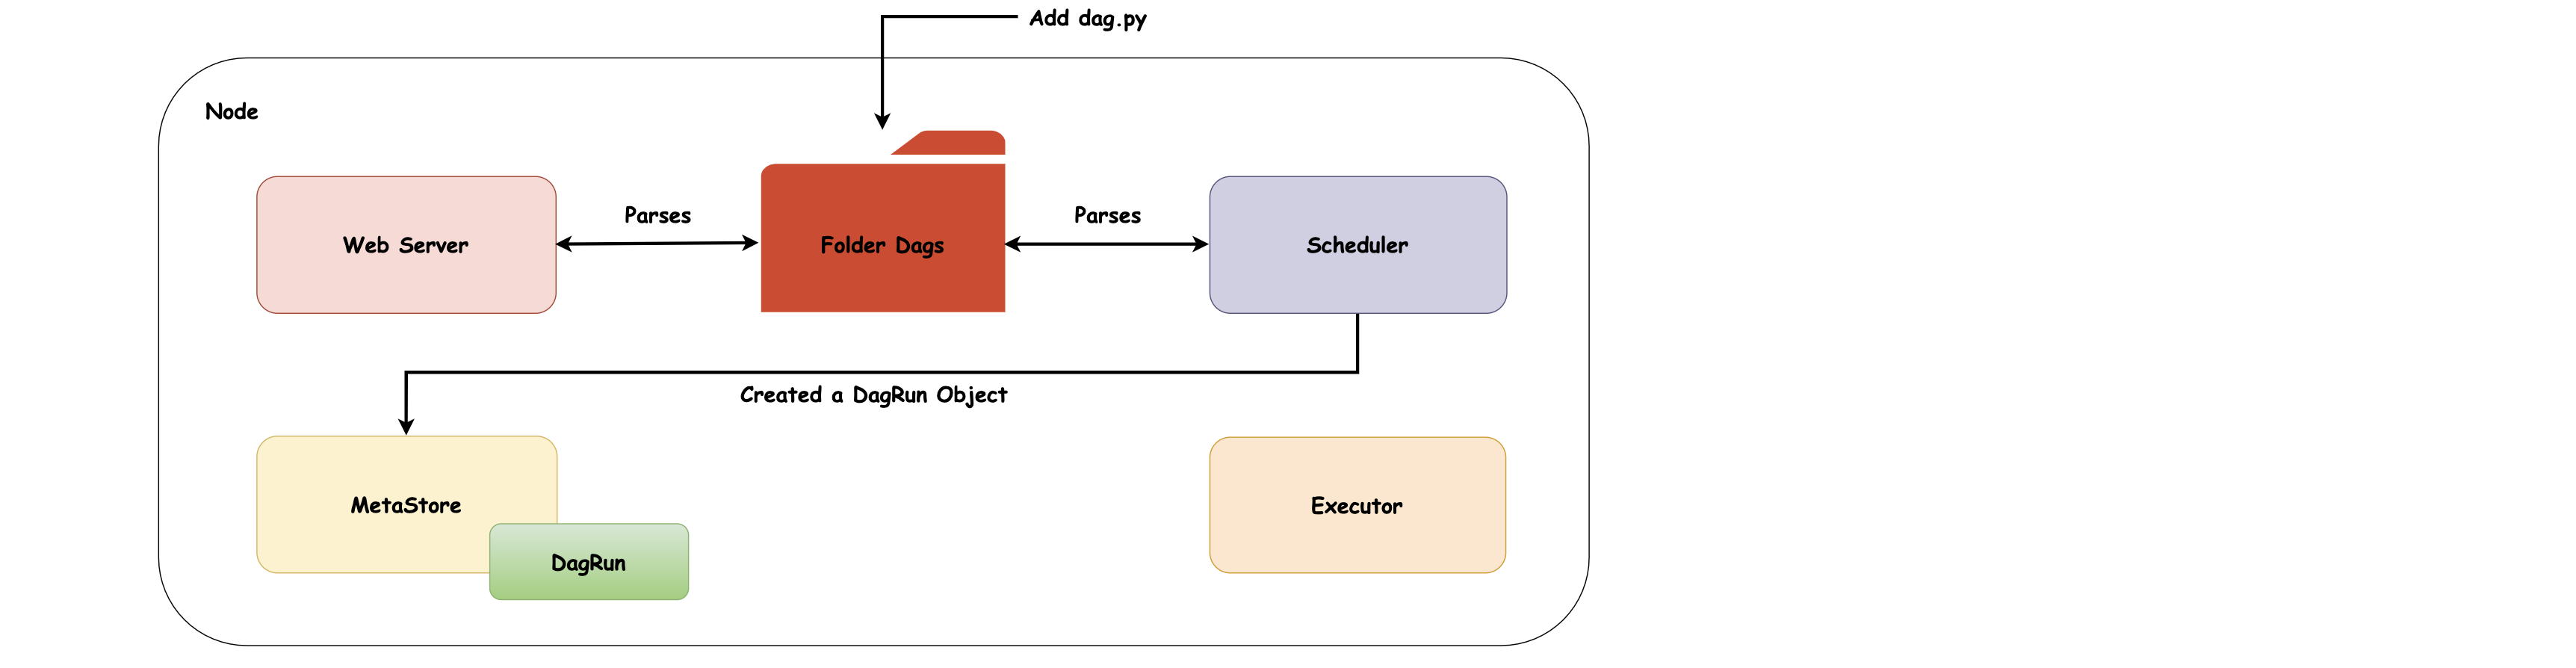

- If there are `tasks` ready to be triggered within the `DAG`, the `scheduler` creates a `TaskInstance` object corresponding to our task in the `metadata database`, marked as status **`scheduled`**.

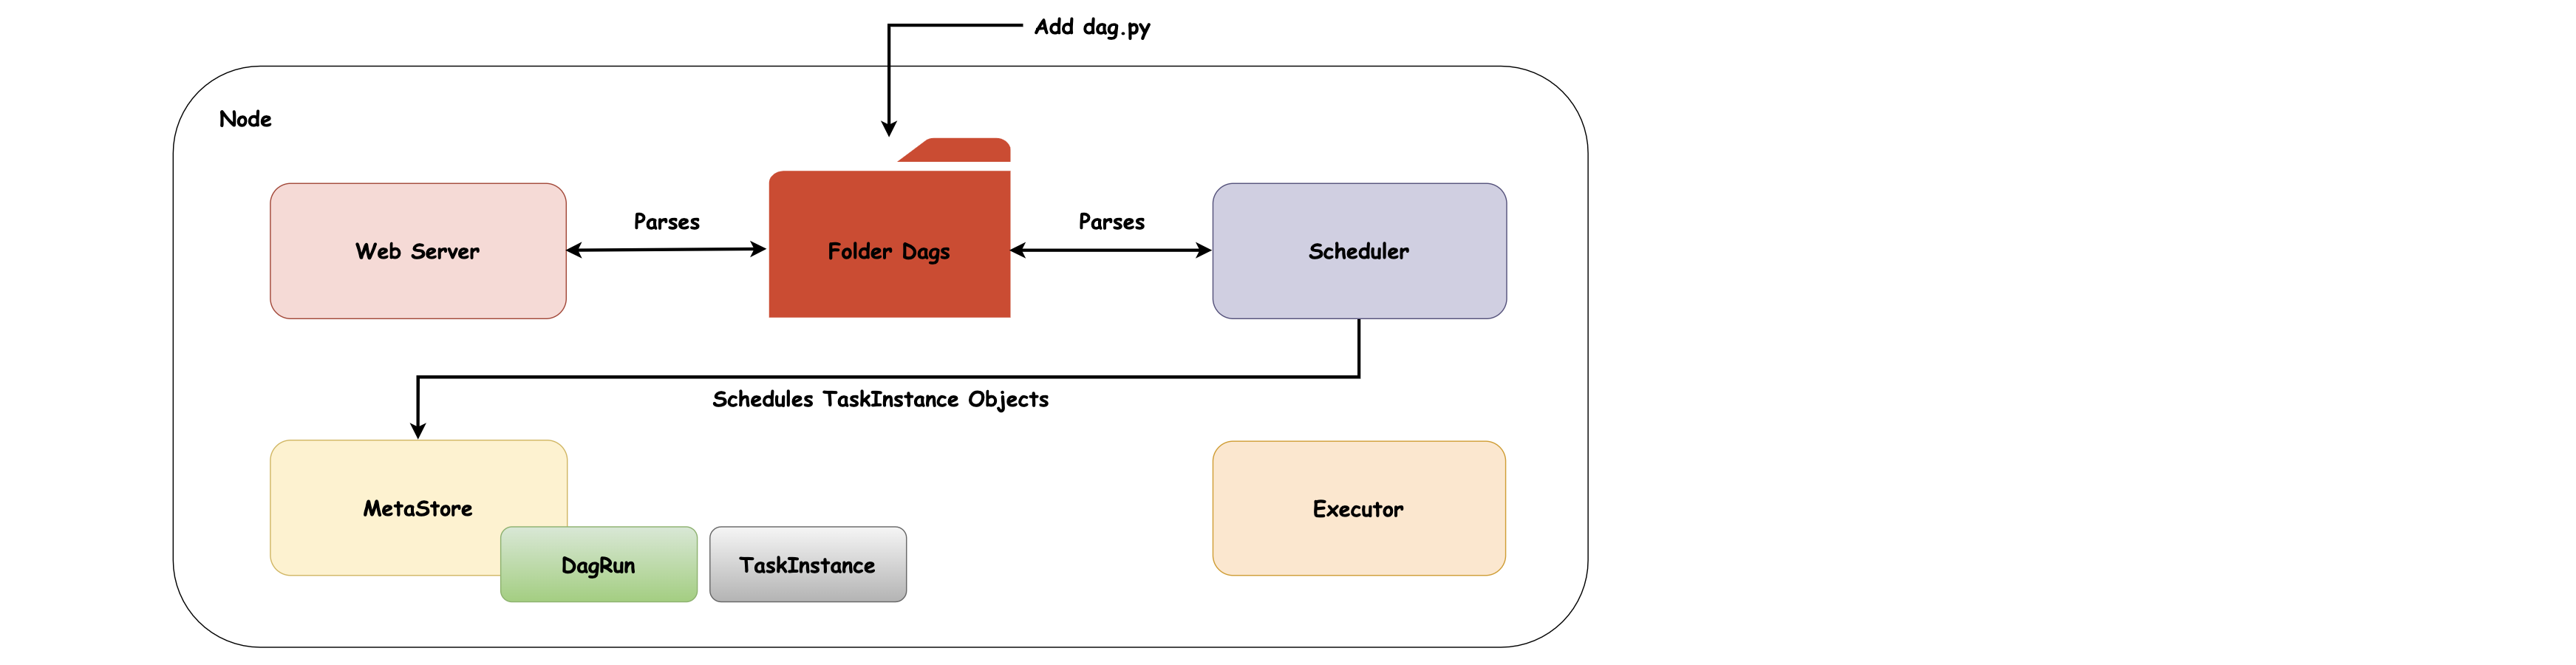

- Next, the `scheduler` sends the `TaskInstance` objects to the executor with the status **`queued`**.

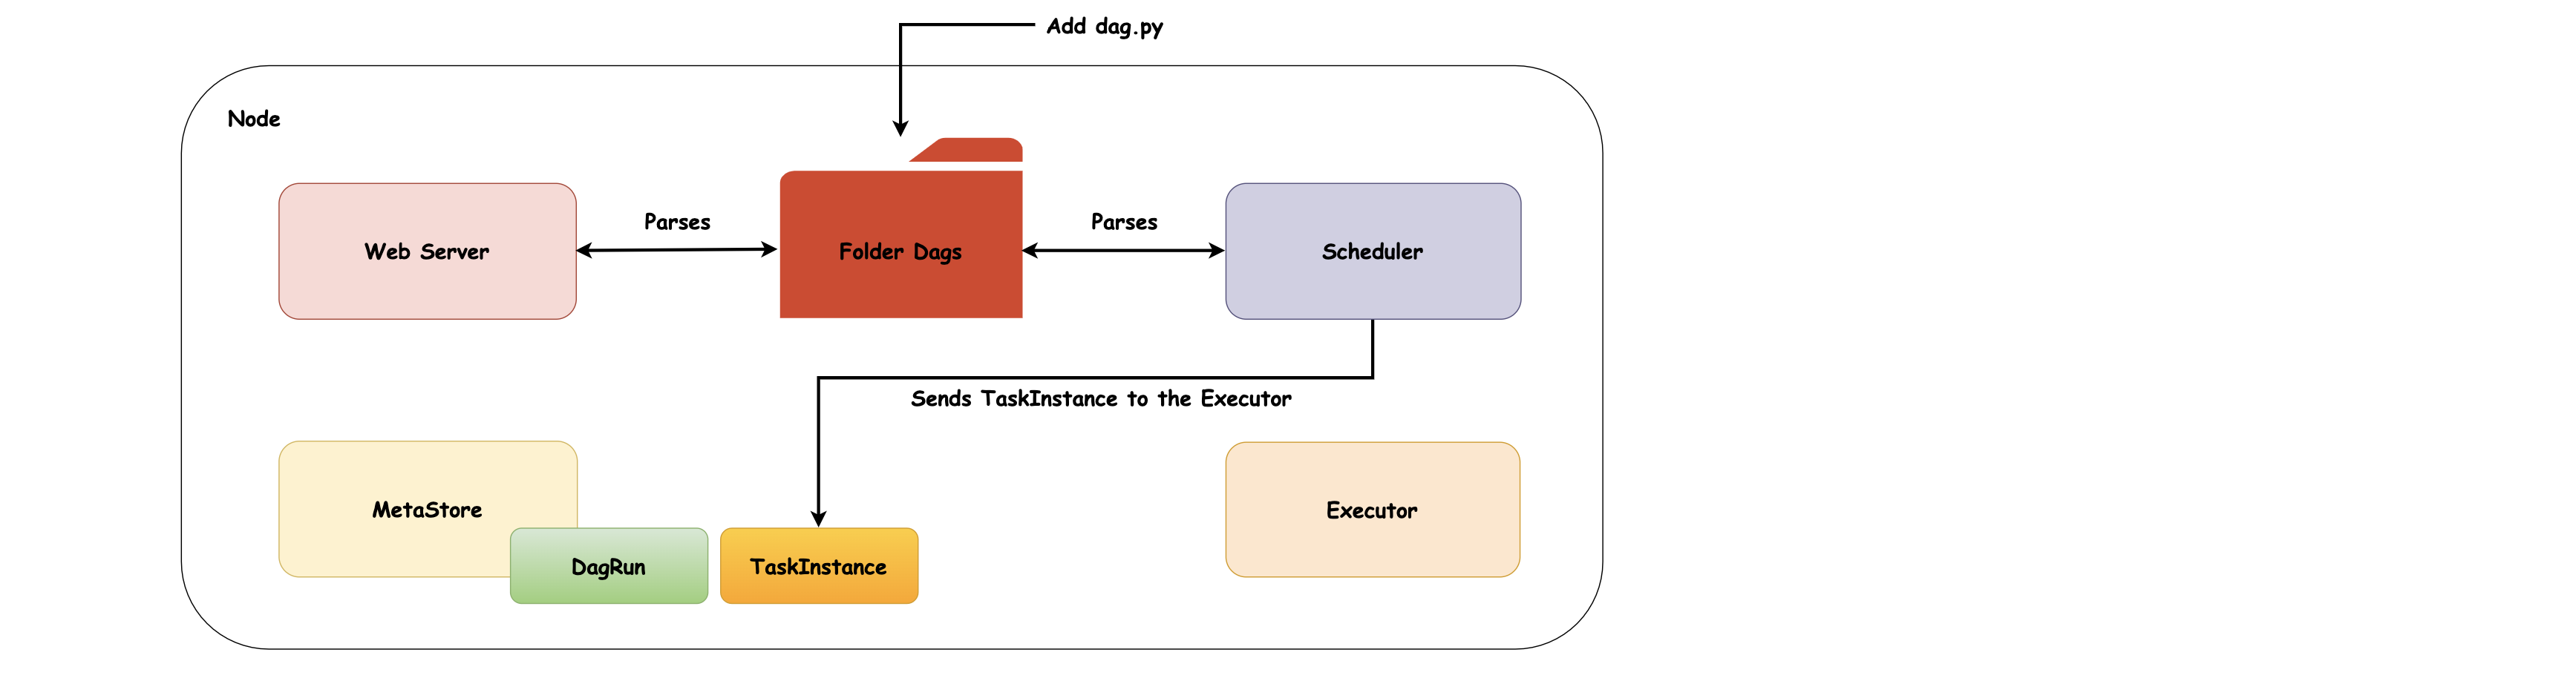

- Once the `executor` is ready to run the task, It changes the status of the `TaskInstance` object to `running` in the `metadata database`.

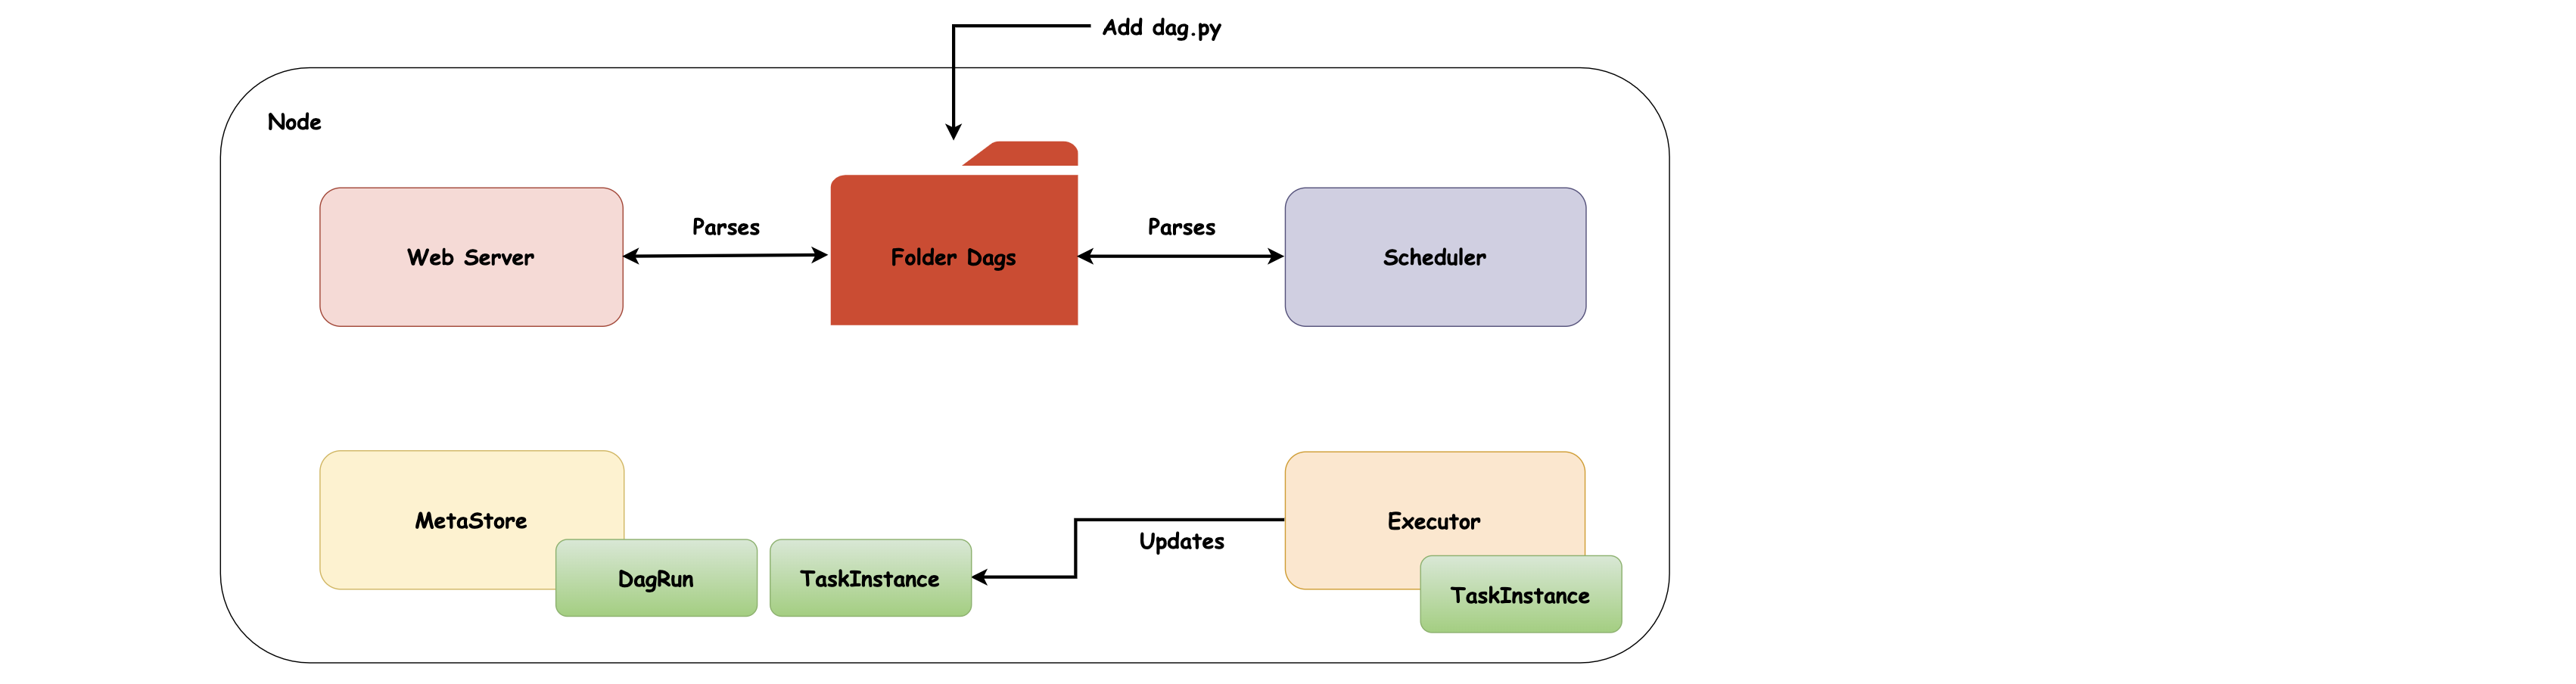

- Once the `task` completes, the `executor` updates the status of the task again in the `metadata database`.

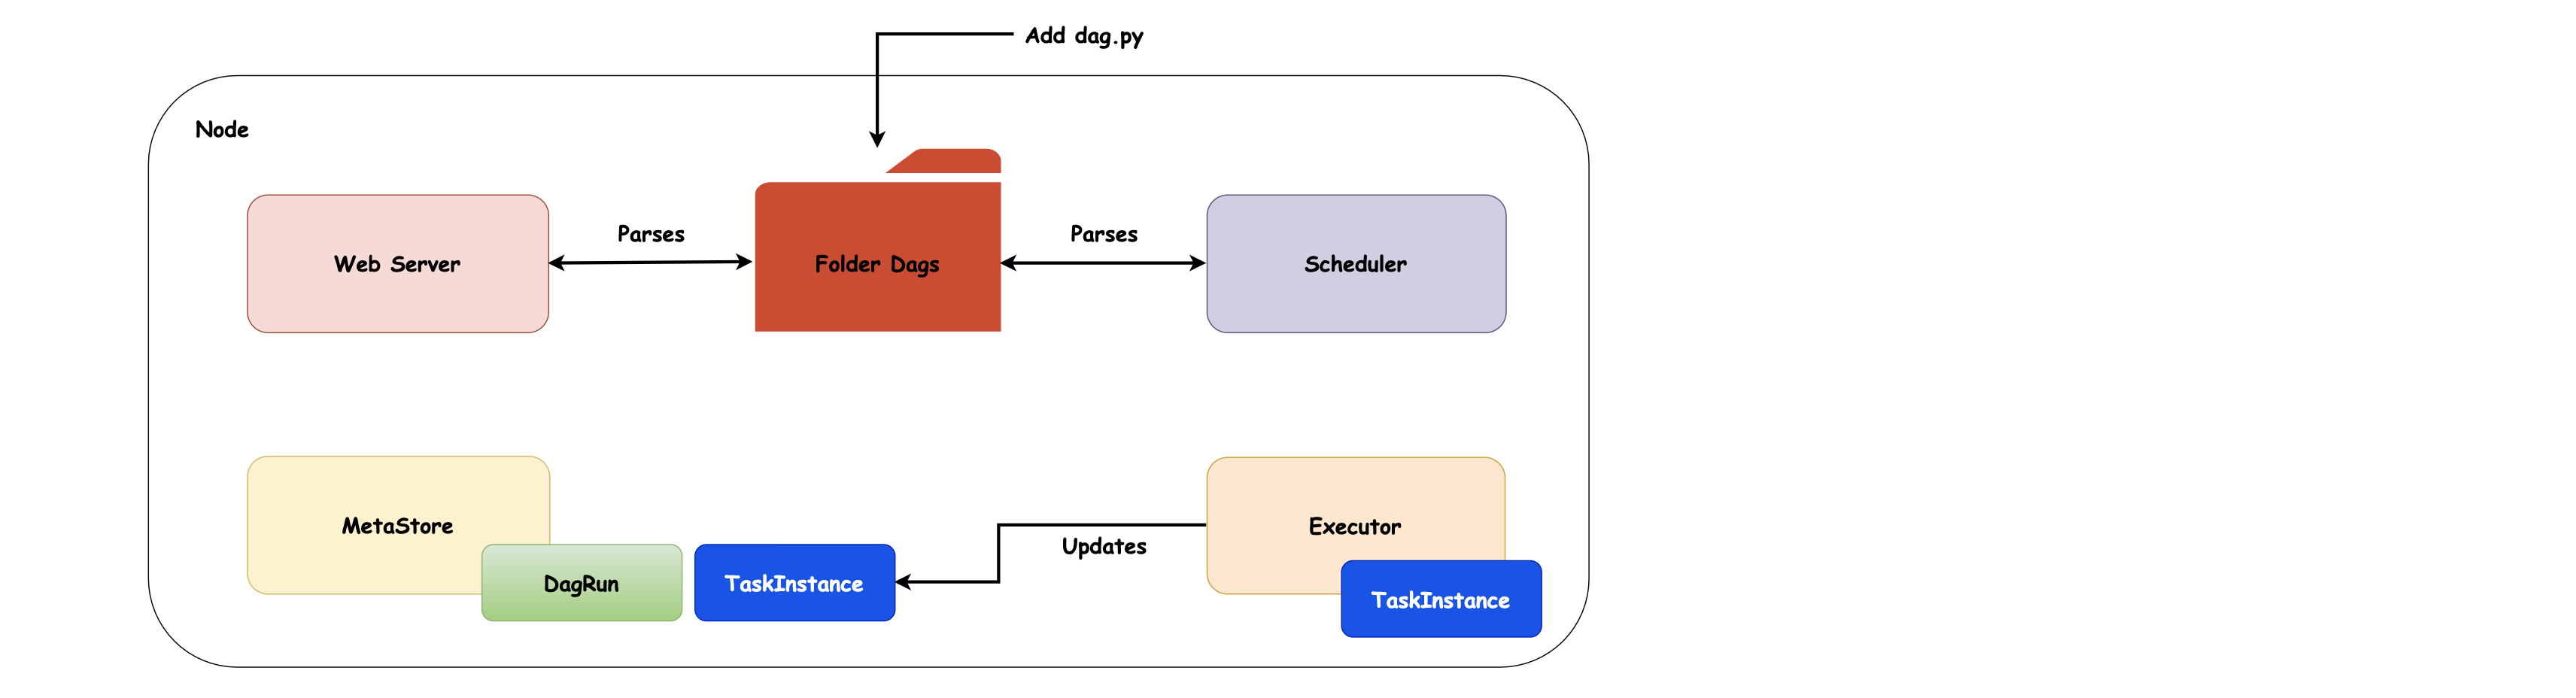

- Finally, the `scheduler` verifies if all the tasks are done; if yes, it marks the `DagRun` object as **`completed`**.

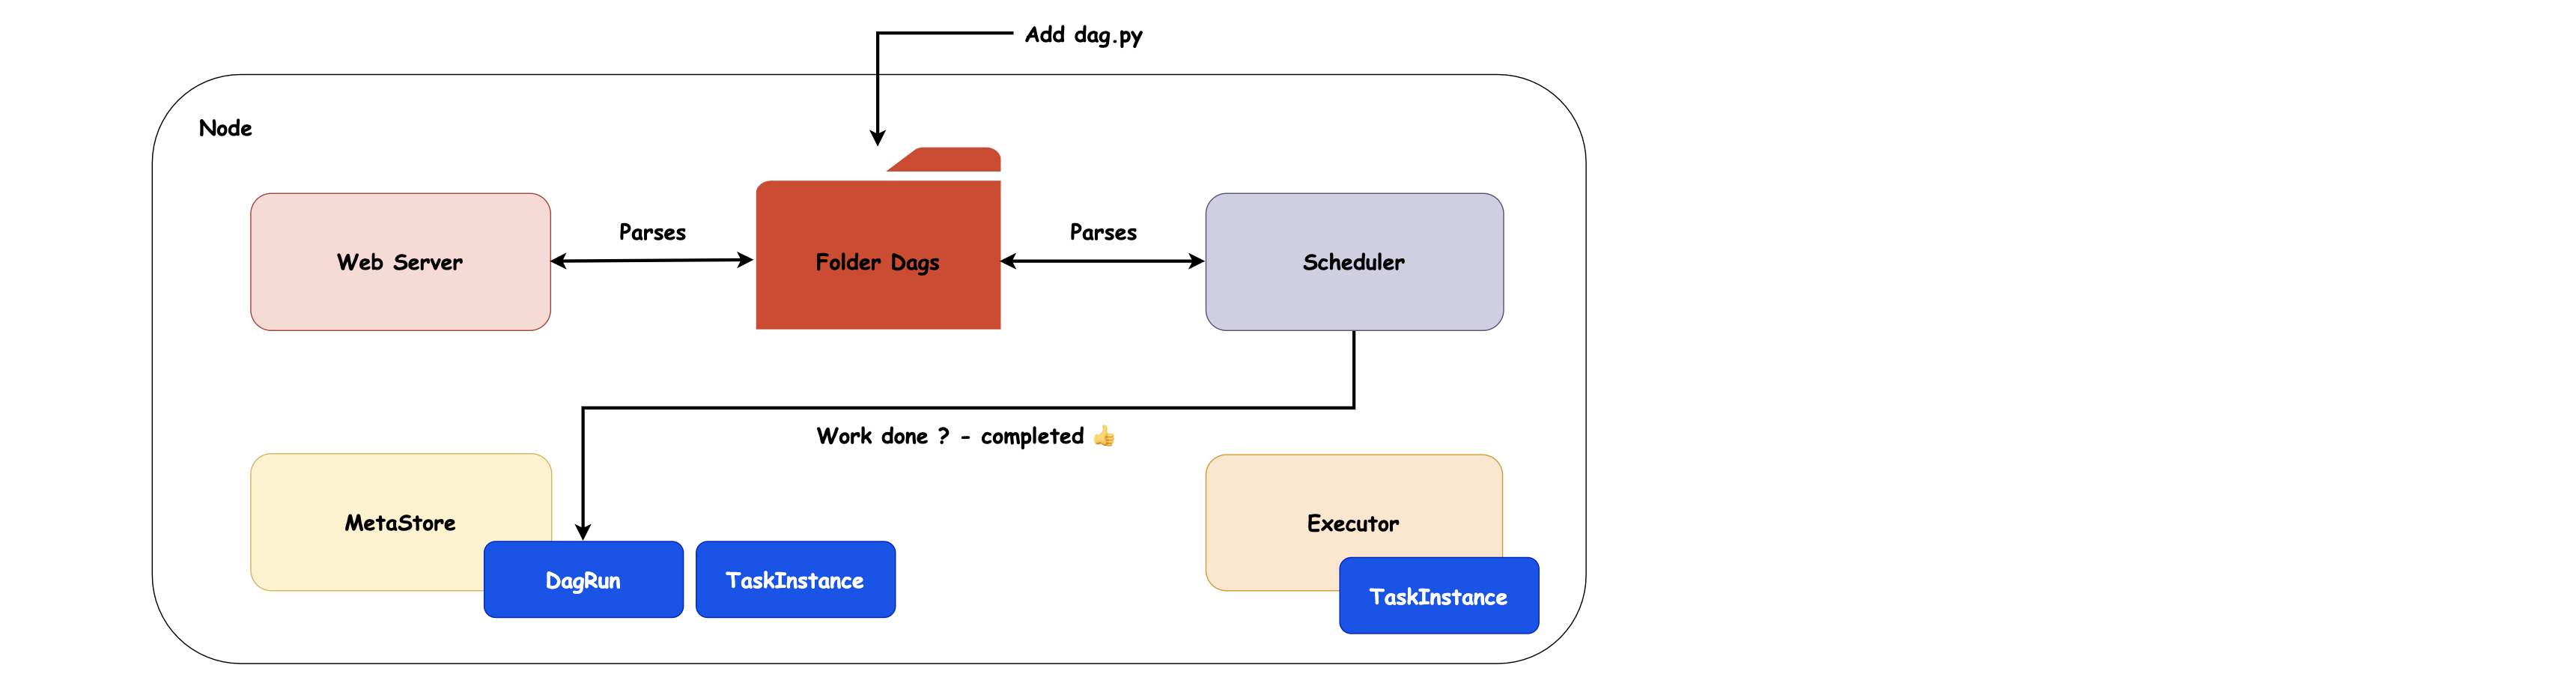

- Lastly, the `web server` refreshes the user interface to display the latest information about the DAG and its tasks.

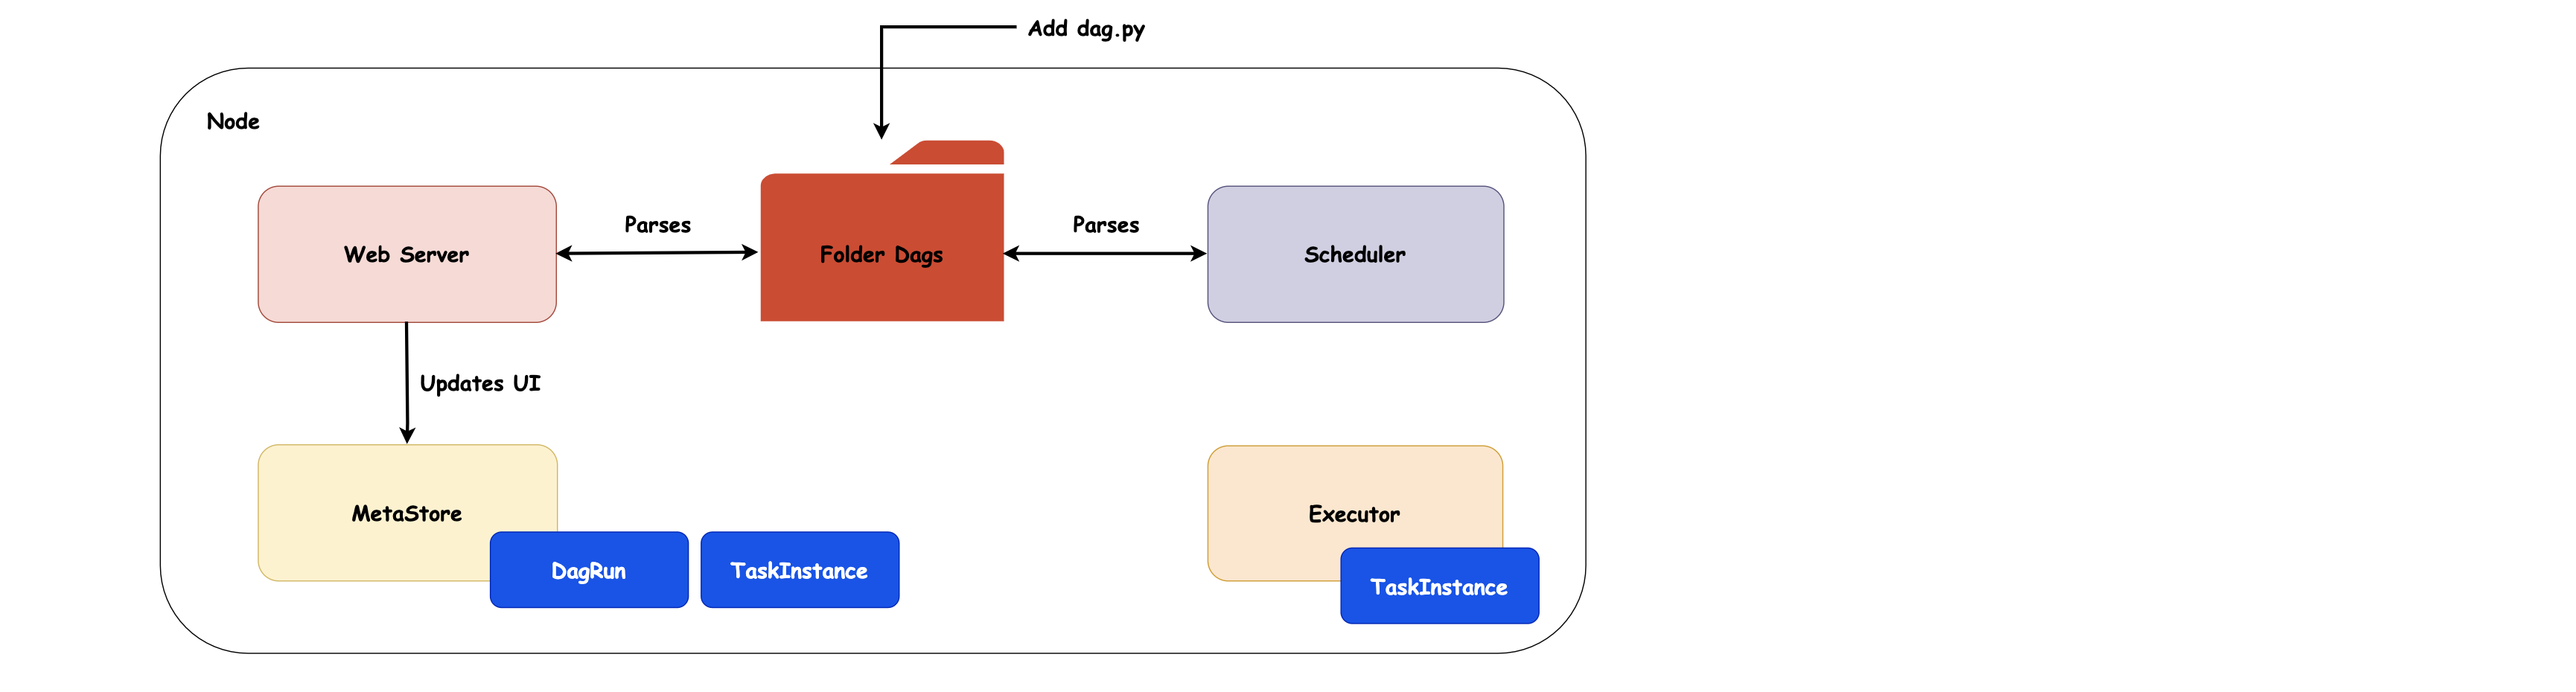